<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./2_3_S6_coastal_waveforms.ipynb" target="_blank"><< Coastal waveforms</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./2_5_acquire_S6_available_cycles.ipynb">Acquire a Sentinel-6 track over all available cycles >></a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2024 European Union <br>
**License:** MIT <br>
**Authors:** Vinca Rosmorduc (CLS), Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-s6"><img src="https://img.shields.io/badge/open-EUMETLAB-E67E22.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://user.eumetsat.int/data/themes/marine"><img src="https://img.shields.io/badge/open-USER PORTAL-154360.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fsensors%2Flearn-s6/HEAD?labpath=2_S6_advanced%2F2_4_iono_corr_solarstorms.ipynb"><img src="https://mybinder.org/badge_logo.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://jupyterhub.prod.wekeo2.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/learn-s6/2_S6_advanced/2_4_iono_corr_solarstorms.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg"></a></div>
   <div style="float:left"><p>&emsp;</p></div>
   <div style="float:left"><a href="https://code.insula.destine.eu/hub/"><img src="https://img.shields.io/badge/launch-DestinE-f43fd3.svg"></a></div></div>
</html>

<div class="alert alert-block alert-success">
<h3>Learn Sentinel-6: Advanced</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>
    
This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to use the EUMETSAT Data Store
    
There are no prerequisite notebooks for this module.
</div>
<hr>

# 2.4 How can a solar storm impact SSH measurement?

### Data used

| Product Description  | EUMETSAT Data Store collection ID| EUMETSAT collection<br>description | WEkEO dataset ID | WEkEO description |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:--------:|
| Sentinel-6 Poseidon-4 Altimetry level 2 Low Resolution   | EO:EUM:DAT:0854 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0854" target="_blank">Description</a> | EO:EUM:DAT:0854| <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3A0854" target="_blank">Description</a> |
| Sentinel-6 Poseidon-4 Altimetry level 2 Low Resolution (baseline version F08; reprocessed)  | EO:EUM:DAT:0842 | <a href="https://user.eumetsat.int/catalogue/EO:EUM:DAT:0842" target="_blank">Description</a> | EO:EUM:DAT:SENTINEL-6:0842| <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-6%3A0842" target="_blank">Description</a> |

### Learning outcomes

* How to retrieve L2 Sentinel-6 data at given dates from different products
* Understand the need for the ionospheric correction to compure Sea Surface Heights and get to know its magnitude

### Outline

On May 10-11, 2024 a major solar storm induced beautiful aurorae in a large part of Earth, including at latitudes where they are highly unusual. 
Less known (and less showy), let's see how such a solar storm has an impact on Sea Surface Height altimetry measurements by comparing it at the peak of the phenomena and at another date, quiet on this respect. <br><br>
The ionospheric correction is directly proportional to the ionospheric Total Electron Content (TEC), which is primarily controlled by solar radiation. Thus, the spatial distribution and temporal variability of the correction are function of three main factors:<br>
• Solar activity: values of the correction increase during periods of stronger solar activity<br>
• Local time: absolute values of the correction are higher during local day times (maximum values around local 14:00) and lower during local night times (minimum values around local 2:00)<br>
• Latitudinal location: correction values are highest within the tropics (maxima at around ±15◦ of latitude) and smallest at high latitudes<br><br>
The ionospheric correction is provided as an output of the dual-frequency altimeter -- the delay induced by the electrons in the ionosphere is a function of the wavelength used, thus comparing two different frequencies (Ku- and C-band) enable to compute it. A modelled correction is also provided.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
1. [Downloading altimetry products from the EUMETSAT Data Store via API](#section1)
1. [Opening our data sets and collating variables](#section2)
1. [Plotting our collated variables](#section3)
1. [Statistical comparisons](#section4)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../README.md" target="_blank">README</a>**.

In [1]:
import os                              # a library that allows us access to basic operating system commands
import json                            # a library that helps us make JSON format files
import eumdac                          # a tool that helps us download via the eumetsat/data-store
import datetime                        # a library that allows us to work with dates and times
import shutil                          # a library that allows us access to basic operating system commands like copy
import xarray                          # a library that helps us work efficiently with multi-dimensional arrays
import matplotlib                      # a library the provides plotting capability
import matplotlib.pyplot as plt        # a library the provides plotting capability
import cartopy                         # a library that supports mapping and projection
import cartopy.crs as ccrs             # a library that supports projection
import cartopy.io.img_tiles as cimgt   # a subcomponent of cartopy that plots land tiles
import numpy as np                     # a library that lets us work with arrays; we import this with a new name "np"
from pathlib import Path               # a library that helps construct system path objects
import warnings                        # a library that supports managing warning messages
import glob                            # a library that helps us to find files

warnings.filterwarnings("ignore")      # this turns off some unnecessary warnings
%matplotlib inline

We will download data from May 10, 15:00UTC to May 11, 15:00UTC (end of episode May 12, 06:00UTC) in 2024 (solar storm) and 2022 (low solar activity). See https://kp.gfz-potsdam.de/en/figures/kp-since-1932 for an index of geomagnetic activity, in relation with aurorae probability.

In [2]:
# defining out period to search for data; we will look over 24 hours at the peak of the solar storm arrival on Earth in 2024, 
# from 10 May 2024, 15h UTC to 11 May 2024, 115h UTC, and two years before (in 2022; same days/hours):

solarstormday = datetime.datetime(2024, 5, 10, 15, 0)

years = (solarstormday.year-2, solarstormday.year)
download_root = "products/ionocase/"

download_data = False

We define a function to download the data: we will be doing it twice, so using a function is better than copy-pasting the whole code with only the year changing. 
The NTC L2 data can be in the operational collection (latest dates) or in the reprocessed collection. The code below is testing both options by searching in all the collections IDs provided in the list 'list_colIDs', depending on the start/end dates and timeliness (timeliness is only useful for the operational collection, the reprocessed collections have only one timeliness, NTC). It is also selecting only the 'Reduced' products using the product name (the ionospheric correction is in this product, and we won't need what is in the standard or extended products as additional variables).

In [3]:
def data_download(year, list_colIDs):
    '''
    this function downloads NTC data from EUM datastore, provided 
        1/ a token has been retrieved
        2/ a year & a list of product IDs is provided (start / end day & hour defined)
    '''

    #create sub-folders, one for each year, to store the downloaded data in
    download_dir = os.path.join(os.getcwd(), download_root, str(year)+"/")
    os.makedirs(download_dir, exist_ok=True)

    if download_data:
        # look in all the collections IDs provided in the list in entry
        for collectionID in list_colIDs:   
            collectionID = collectionID
        # space/time filter the collection for products
            selected_collection = datastore.get_collection(collectionID)

        # list the products within the collection matching the start/end dates and the timeliness NTC
            products = selected_collection.search(
                dtstart=datetime.datetime(year, 5, 10, 15, 0),
                dtend=datetime.datetime(year, 5, 10, 15, 0)+datetime.timedelta(days=1),
                timeliness="NT")

        #in all the products found, download only the ones which names include 'S6A_P4_2__LR_RED_' (RED for reduced dataset).
            for product in products:
                for entry in product.entries:
                    if 'S6A_P4_2__LR_RED_' in entry:
                        with product.open(entry=entry) as fsrc, open(os.path.join(os.getcwd(), download_dir, fsrc.name), mode='wb') as fdst:
                            print(f'Downloading {fsrc.name}.')
                            shutil.copyfileobj(fsrc, fdst)
                            print(f'Download of file {fsrc.name} finished.')
                    


<hr>
<div class="alert alert-info" role="alert">

## 3. <a id='section3'></a>Downloading altimetry products from the EUMETSAT Data Store via API
[Back to top](#TOC_TOP)

</div>

<div class="alert alert-block alert-success">

### Accessing the EUMETSAT Data Store

To access Copernicus marine data from the <a href="https://data.eumetsat.int " target="_blank">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`) python package. If you are working with the recommended Anaconda Python distribution and used the environment file included in this repository (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

You can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac " target="_blank">EUMETSAT GitLab</a>. Please visit the EUMETSAT user portal for more information on the <a href="https://user.eumetsat.int/data-access/data-store " target="_blank">EUMETSAT Data Store</a> and <a href="https://user.eumetsat.int/resources/user-guides/eumetsat-data-access-client-eumdac-guide " target="_blank">eumdac</a>.

To download data from the EUMETSDAT Data Store via API, you need to provide credentials. To obtain these you should first register at for an <a href="https://eoportal.eumetsat.int/" target="_blank">EUMETSAT Earth Observation Portal account</a>. Once you have an account, you can retrieve your `<your_consumer_key>` and `<your_consumer_secret>` from the <a href="https://api.eumetsat.int/api-key/ " target="_blank">"EUMETSAT Data Store API"</a> page (*Note: you must click the "Show hidden fields" button at the bottom of the page to see the relevant fields*). If you do not already have a local credentials file, you will be prompted to enter your credentials when you run the cell below. This will create the required local credentials file, so that you only need to run this once.

*Note: your key and secret are permanent, so you should take care to never share them*

</div>

In [4]:
# load credentials
eumdac_credentials_file = Path(Path.home() / '.eumdac' / 'credentials')

if os.path.exists(eumdac_credentials_file):
    consumer_key, consumer_secret = Path(eumdac_credentials_file).read_text().split(',')
else:
    # creating authentication file
    consumer_key = input('Enter your consumer key: ')
    consumer_secret = getpass.getpass('Enter your consumer secret: ')
    try:
        os.makedirs(os.path.dirname(eumdac_credentials_file), exist_ok=True)
        with open(eumdac_credentials_file, "w") as f:
            f.write(f'{consumer_key},{consumer_secret}')
    except:
        pass
        
token = eumdac.AccessToken((consumer_key, consumer_secret))
print(f"This token '{token}' expires {token.expiration}")

This token '0db6910c-9ea3-3a4a-a21e-4b34b2fd18f8' expires 2025-03-21 13:19:34.698071


Now we have a token, we can create an instance of the EUMETSAT Data Store.

In [5]:
datastore = eumdac.DataStore(token)

We will list the "collections" including Poseidon-4 (Sentinel-6's altimeter) in their name.

In [6]:
if download_data:
    #list Poseidon-4 collection IDs
    datastore = eumdac.DataStore(token)
    for collection_id in datastore.collections:
        if ("Poseidon-4" in collection_id.title):
            print(f"Collection ID({collection_id}): {collection_id.title}")

We will use the Level 2 Low Resolution data to show the ionospheric correction impact. However, at the date of writing these comments (June 2024), May 2022 and May 2024 are in different Collections, since one is "reprocessed", the other is operational. In the future, both will be in the reprocessed collection, but probably with a different baseline number (i.e. a newer reprocessing version). 

Currently, the operational (2024) collection is EO:EUM:DAT:0854 and the reprocessing baseline version is F08 for 2022, EO:EUM:DAT:0842 (retrieval done on June 28, 2024).

We'll try to select automatically the right Collection ID(s): the *_latest_* reprocessed version at this date, and also the operational version. See notebook 2.5 for a test to select the latest version number whatever it is at the date of the execution.

In [7]:
# list the relevant Sentinel-6 collection IDs and store them in a list to access them. The lowest version number currently available is F06, 
# we will start from this number, to compare it with the one(s) in the collections' names, to take the highest (note that the list of collection is
# not ordered chronologically nor alphabetically.  Note that the version number position in the title will change with the product name, 
# but will be after F. 

target_collection = "Poseidon-4 Altimetry Level 2 Low Resolution"
version_number = 6
list_colIDs = []
for collection_id in datastore.collections:
    if (target_collection in collection_id.title):
        # for reprocessed collection, the "baseline" (i.e. the version) is provided in the title. 
        # We are searching for the highest of this version number
        if ("baseline version" in collection_id.title):
            vnum_start = collection_id.title.find('baseline version F')+len('baseline version F')
            if version_number < int(collection_id.title[vnum_start:vnum_start+2]):
                version_number = int(collection_id.title[vnum_start:vnum_start+2])
                highest_version_ID = collection_id
        else:
            list_colIDs.append(str(collection_id))
            if "non-public" in collection_id.abstract: continue

list_colIDs.append(str(highest_version_ID))

print(list_colIDs)

['EO:EUM:DAT:0854', 'EO:EUM:DAT:0842']


See 3rd cell for the function with the code of the actual download. 

In [8]:
for year in years:
    data_download(year, list_colIDs)

Now we will be reading the data, making two different datasets, for comparison (one 2022, the other 2024)

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Opening our data sets and collating variables
[Back to top](#TOC_TOP)

</div>

In [9]:
# define a dictionary to store our variables
S6_vars = {}

for year in years:
    download_dir = os.path.join(os.getcwd(), download_root, str(year)+"/")
    s6_files = glob.glob(os.path.join(download_dir,'S6A_P4_2__LR_RED_*.nc'))
    # we sort the files - by default it is "alphabetical" order, but pass numbers are also correctly ordered, which provide with a time-ordered list
    # this sorting will provide with a well-orderer dataset/nc file. 
    # It is not absolutely essential here, but could be necessary in other cases
    s6_files.sort()

    if s6_files != []:
        #we will use variables which are all in the data_01 group, so this is the only one we're opening
        s6data01 = xarray.open_mfdataset(s6_files, group='data_01', combine='nested', concat_dim='time', compat='no_conflicts')
    else:
        print('no files found')

    #select the variables we need and store them in sub-dictionaries (by year)
    
    S6_vars[year] = {}
    #definition of the variables we will need
    S6_vars[year]['pass_direction_flag'] = s6data01['pass_direction_flag'] #desc 0, asc 1
    
    # for the other variables, we select only the ocean values (0) (for the pass direction it is the same value for a whole track)
    S6_vars[year]['surface_classification_flag'] = s6data01['surface_classification_flag']
    s6data01ocean = s6data01.where(S6_vars[year]['surface_classification_flag'] == 0)
    S6_vars[year]['latitude'] = s6data01ocean['latitude']
    S6_vars[year]['longitude'] = s6data01ocean['longitude']
    S6_vars[year]['time'] = s6data01ocean['time']
    # we select the filtered ionospheric correction - the others are much noisier, and we will be looking at large-scale features. 
    S6_vars[year]['iono_cor_alt_filtered'] = s6data01ocean['iono_cor_alt_filtered']
    
    s6data01.close()
    #s6data_01ku.close()

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Plotting our collated variables
[Back to top](#TOC_TOP)

</div>

Plotting the data from 2022 and 2024 on simple maps. 

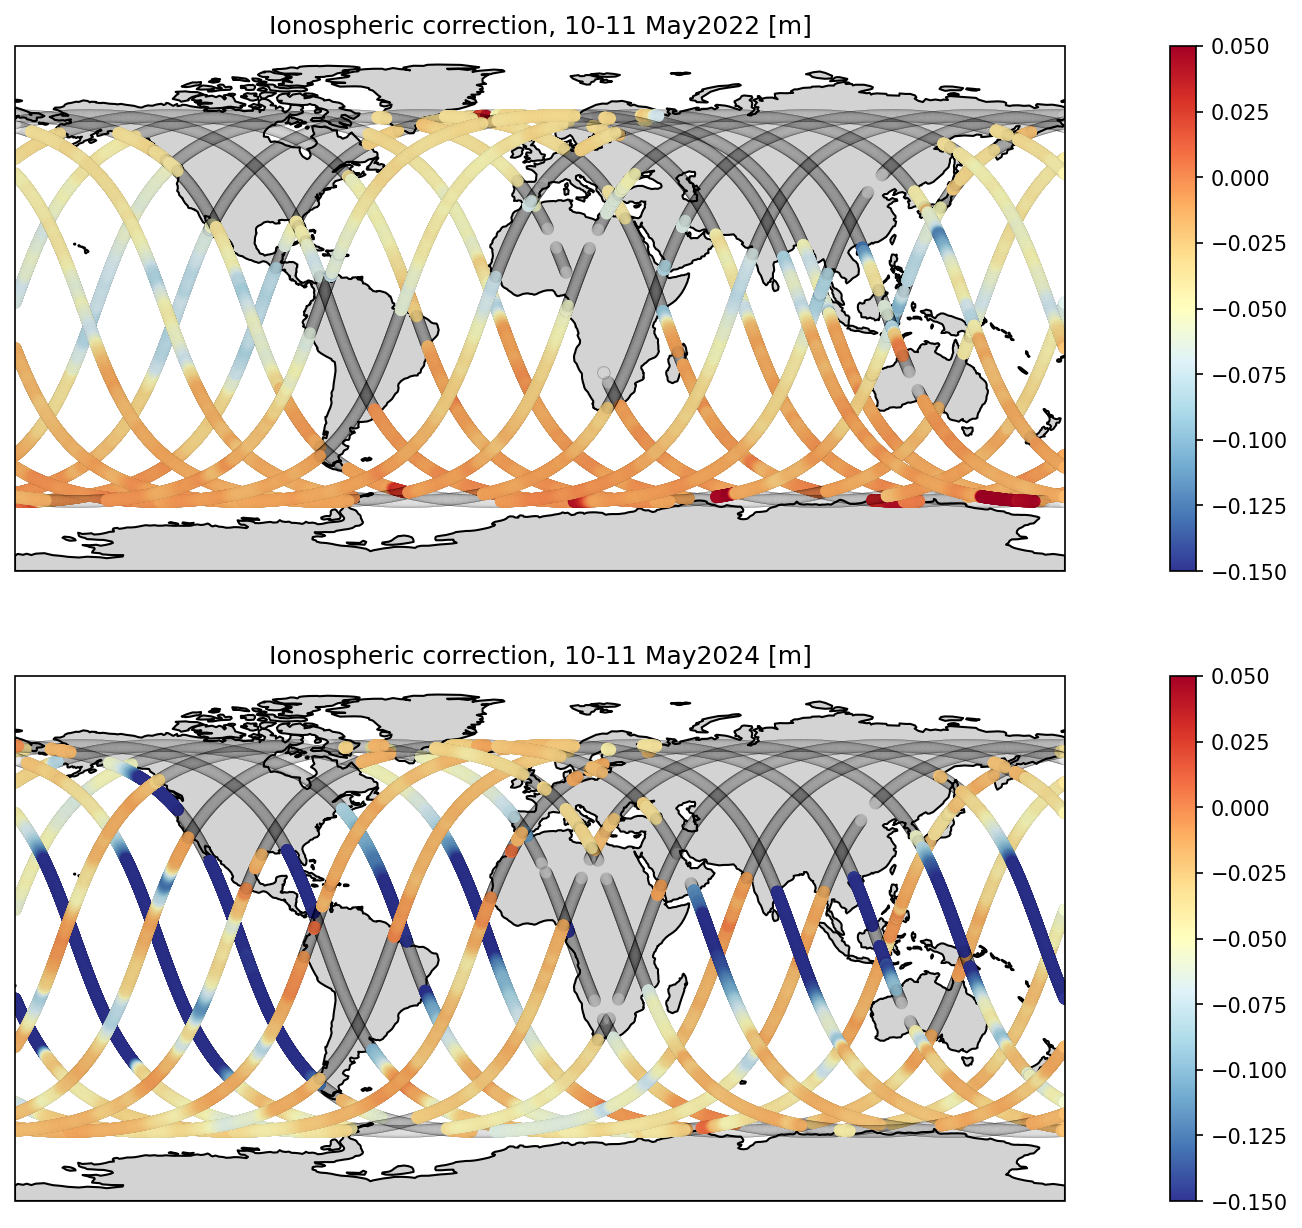

In [10]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), dpi=150, sharex=True, sharey=True, subplot_kw={"projection": ccrs.PlateCarree()})
cmap = plt.cm.RdYlBu_r

for ax, year in zip(axs, years):
    ax.set_extent([-180, 180, -90, 90])
    ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=0)
    trackmap = ax.scatter(S6_vars[year]["longitude"], S6_vars[year]["latitude"], c=S6_vars[year]["iono_cor_alt_filtered"], cmap=cmap, marker='o',\
                          vmin=-0.15, vmax=0.05, edgecolors='black', linewidth=0.01, transform=ccrs.PlateCarree())
    cbar = plt.colorbar(trackmap, ax=ax)
    ax.set_title('Ionospheric correction, 10-11 May'+str(year)+' [m]', size=12)

plt.savefig("iono2022vs204.png", bbox_inches="tight")
plt.show()


We can see that in 2024 all descending tracks have lower values i.e. higher absolute values of the correction, meaning more electrons in the ionosphere -- they are slowing the radar wave used by the altimeter -- than all ascending tracks, at least at temperate/tropical latitudes for that day. There is a slight difference in 2022 between ascending and descending tracks, but much less obvious.<br>

The Extreme Ultraviolet and X-ray which are ionising the upper atmosphere (the layer between 60 and 1 000 km, called "ionosphere") come from the sun. The more active the sun is, the more intense the irradiance by those high-energy rays. Thus, in case of solar storm ionization of the ionosphere is noticeably higher than in "calm" periods. <br>

Geometrically, direct exposition to the sun is important here: descending tracks are at the opposite of the diurnal phase than their ascending counterparts. Said otherwise, if the Sun is shining on the side of the Earth where the satellite is descending, it is night on the other side where it is ascending (or vice-versa at other dates). There are a bit more than 24 tracks a day (27) but not much more, so it roughly means that during one single day all descending tracks will be more or less under daylight and all ascending tracks nighttime, or vice-versa (it shifts over time). Except of course close to the poles. <br>

We will use the formula " solar_local_time = UTC_time + longitude / 15 " (very, very, rough computation - more a "solar time zone" than solar time proper, but it is sufficient here to pinpoint whether it is day - or night - for a given track, *_at the Equator_*; note that the day/night status would be different when coming close to each of the poles, of course). 

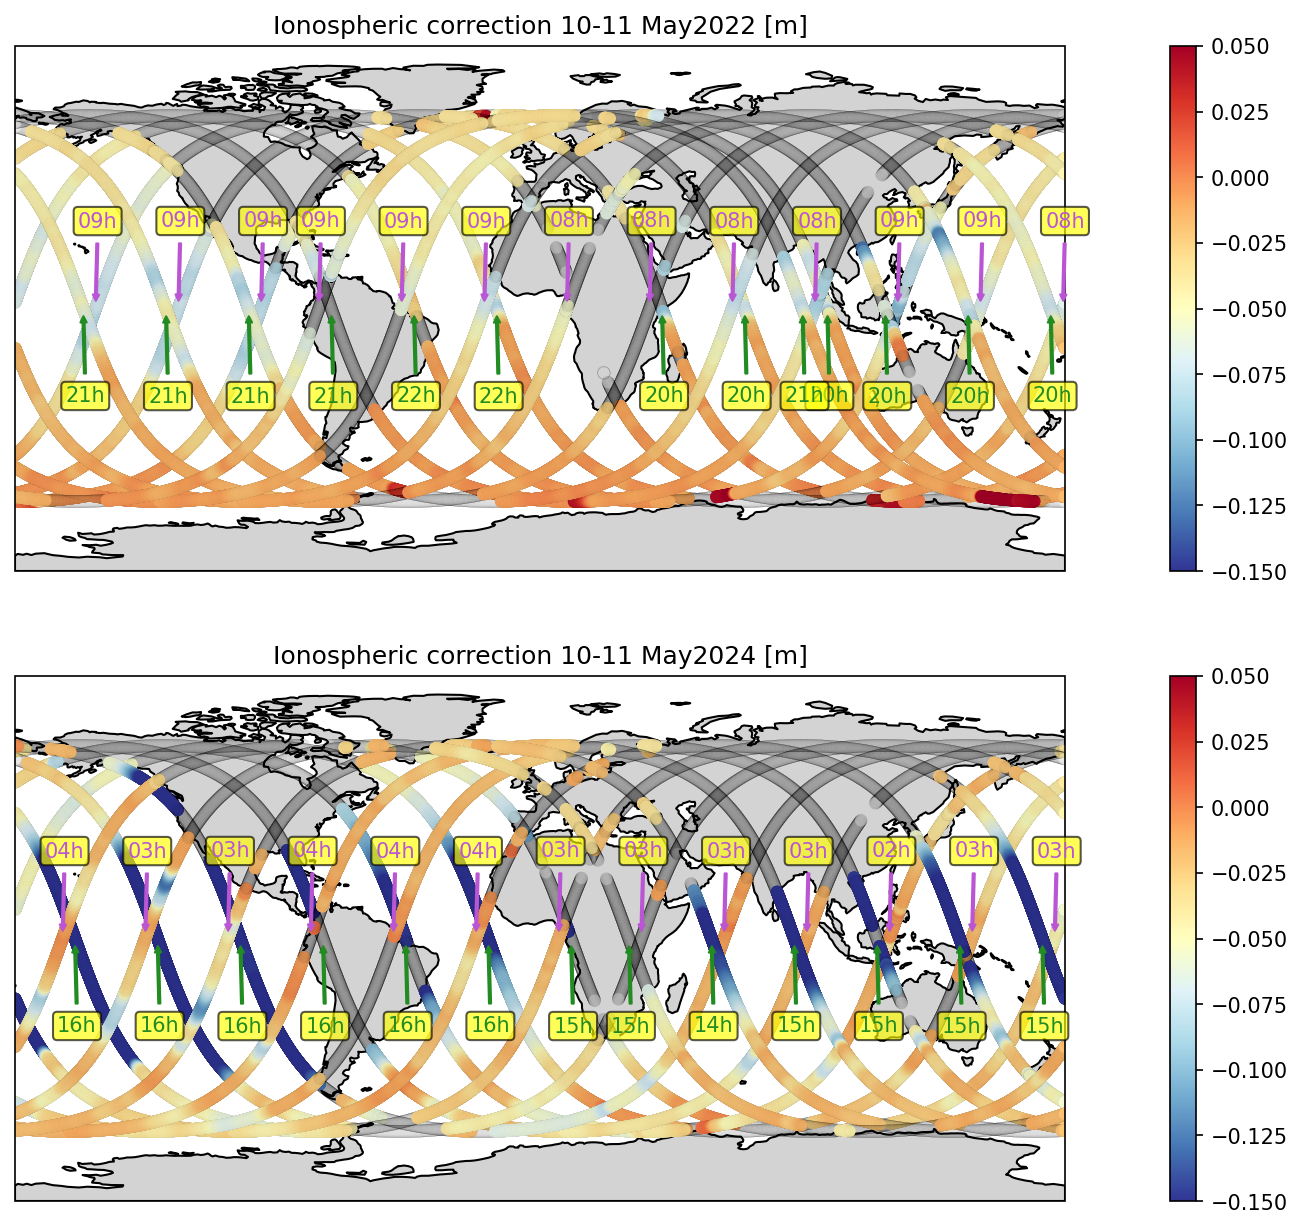

In [11]:
# no measurement will be precisely at the Equator (latitude == 0), so we use an "epsilon" to define the unique point in each track closest to the Equator. 
dlat = 0.05 # approximate step in latitude between two 1Hz measurements at the Equator
dlon = -0.0175 # approximate step in longitude between two 1Hz measurements at the Equator 

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(18, 10), dpi=150, sharex=True, sharey=True, subplot_kw={"projection": ccrs.PlateCarree()})
cmap = plt.cm.RdYlBu_r

for ax, year in zip(axs, years):
    # Selection of the point closest to the equator. 
    closest_pt_Eq = (S6_vars[year]["latitude"] > 0-dlat/2) & (S6_vars[year]["latitude"] < 0+dlat/2)
    
    # define the longitude formatted (-180 - 180°) where the track crosses the Equator, to define an approximate solar time zone, 
    # and have + or - time lags with respect to longitude 0°, and the latitude (both to locate the annotation on the plot).
    # and the corresponding time 
    lon_equator = ((((S6_vars[year]["longitude"].sel(time=closest_pt_Eq)) - 180) % 360) - 180 )
    lat_equator = S6_vars[year]["latitude"].sel(time=closest_pt_Eq).values
    utc_time_equator = S6_vars[year]["time"].sel(time=closest_pt_Eq)

    # 360° divided by 24 hours makes approximate 15° in longitude time-zones (not legal time zone, though)
    solar_time_equator = utc_time_equator + (lon_equator/15).astype('timedelta64[h]')

    # map parameters
    ax.set_extent([-180, 180, -90, 90])
    ax.add_feature(cartopy.feature.LAND, linewidth=1, facecolor='lightgrey', edgecolor='k', zorder=0)
    trackmap = ax.scatter(S6_vars[year]["longitude"], S6_vars[year]["latitude"], c=S6_vars[year]["iono_cor_alt_filtered"], cmap=cmap, marker='o',\
                          vmin=-0.15, vmax=0.05, edgecolors='black', linewidth=0.01, transform=ccrs.PlateCarree())

    # annotate with solar_time_equator (hour only) at lattext,lontext
    # we shift texts one side or the other, depending on each track direction, using the appropriate flag with a slight modification
    # by subtracting 0.5, descending tracks will be negative, ascending positive (while flag is 0 for descending, 1 for ascending)
    passdir = ((S6_vars[year]["pass_direction_flag"].sel(time=closest_pt_Eq).values))
    passsign = np.sign(passdir - 0.5)
    #define latitude to print the hour; delta is purely empirical
    lattext = lat_equator + 600*dlat*passsign
    #define longitude to print the hour; delta is purely empirical
    lontext = lon_equator - 40*dlon
    #desc , asc
    colors = ['forestgreen', 'mediumorchid']
    boxed_arrows_style = ['larrow','rarrow']
    halignment = ['left','right']
    
    #loop over all the tracks to annotate the map at the right places
    for i in range(0,len(lontext)):
        #retrieve only the hour (not the day nor minutes and seconds, and add the unit "h"
        localsolarhour = str(solar_time_equator[i].values)[11:13] + 'h'
        # write this, plus add an arrow pointing to the track at the equator from the text
        ax.annotate(localsolarhour, 
                    bbox=dict(boxstyle='round,pad=0.2', facecolor='yellow', alpha=0.66),
                    xy=(lon_equator[i], lat_equator[i]), 
                    xytext=(lontext[i], lattext[i]), 
                    color=colors[int(passdir[i])],
                    arrowprops=dict(
                        color=colors[int(passdir[i])],
                        shrink=0.1, # distance from point
                        width=1, # width of arrow
                        headwidth=3, # width of arrow head
                        headlength=3 # length of arrow head
                        ), 
                    verticalalignment='center', 
                    horizontalalignment='center')

    cbar = plt.colorbar(trackmap, ax=ax)
    ax.set_title('Ionospheric correction 10-11 May'+str(year)+' [m]', size=12)
plt.savefig("iono-hours_2022vs204.png", bbox_inches="tight")
plt.show()


<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Statistical comparisons
[Back to top](#TOC_TOP)

</div>

Now we will look at the ionospheric correction statistics for the two different days/years. 

In [12]:
for year in years:
    print('May 10-11 ', year)
    print(' min: ', round(np.nanmin(S6_vars[year]["iono_cor_alt_filtered"].values), 2))
    print(' mean', round(np.nanmean(S6_vars[year]["iono_cor_alt_filtered"].values), 2))
    print(' std:', round(np.nanstd(S6_vars[year]["iono_cor_alt_filtered"].values), 2))

May 10-11  2022
 min:  -0.13
 mean -0.03
 std: 0.02
May 10-11  2024
 min:  -0.45
 mean -0.07
 std: 0.07


We will represent those statistics using the "boxplot" representation and splitting the two datasets by ascending and descending tracks - as shown above, the statistics should be much different for the descending tracks (in dark green-blue) than for the ascending (in orange), at least in 2024. 
The boxplot limits show quartiles. It extends from the first quartile to the third quartile of the data, with a line at the median (here in red, blue line, for comparison, is the mean). The whiskers extend from the box to the farthest data point lying within 1.5 times the inter-quartile range from the box. Flier points are those past the end of the whiskers (grey circles) (see matplotlib documentation). 

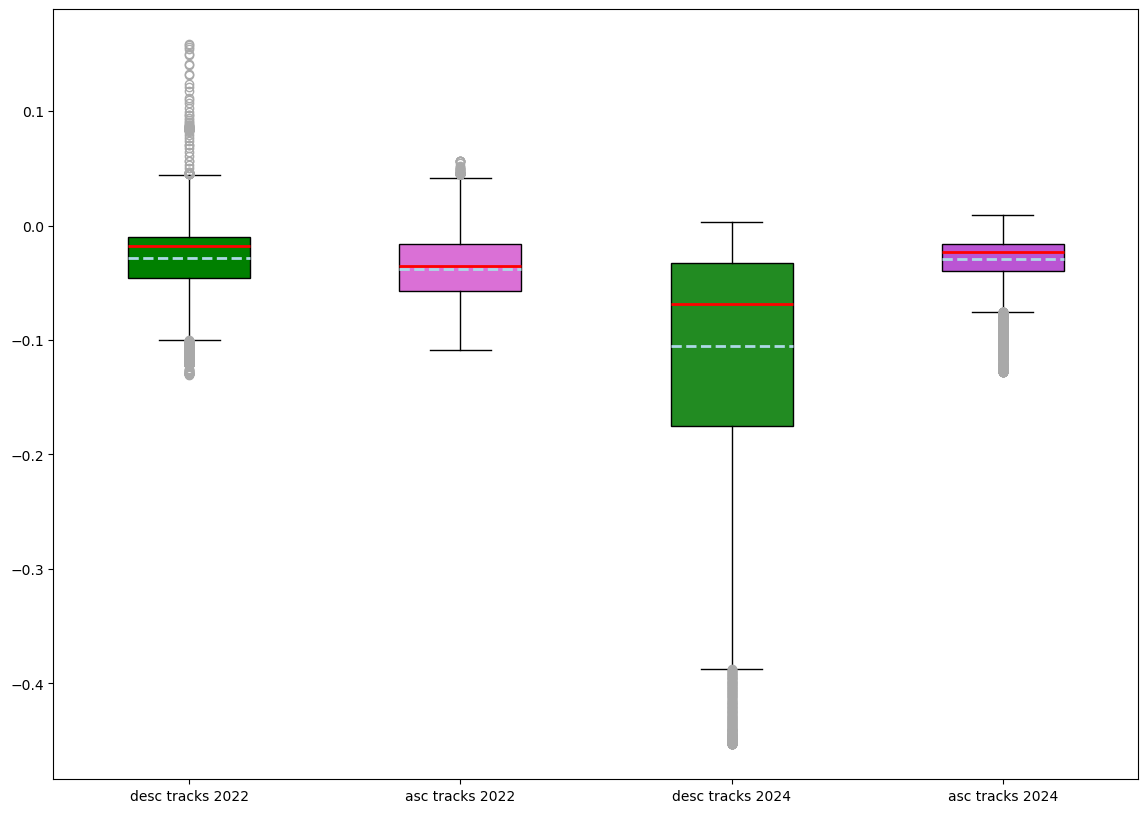

In [13]:
fig, ax = plt.subplots( figsize=(14, 10))

desc_tracks_iono_2022 = S6_vars[2022]["iono_cor_alt_filtered"].sel(time=(S6_vars[2022]["pass_direction_flag"]==0)).dropna(dim="time", how="any")
asc_tracks_iono_2022 = S6_vars[2022]["iono_cor_alt_filtered"].sel(time=(S6_vars[2022]["pass_direction_flag"]==1)).dropna(dim="time", how="any")
desc_tracks_iono_2024 = S6_vars[2024]["iono_cor_alt_filtered"].sel(time=(S6_vars[2024]["pass_direction_flag"]==0)).dropna(dim="time", how="any")
asc_tracks_iono_2024 = S6_vars[2024]["iono_cor_alt_filtered"].sel(time=(S6_vars[2024]["pass_direction_flag"]==1)).dropna(dim="time", how="any")

data = [desc_tracks_iono_2022, asc_tracks_iono_2022, desc_tracks_iono_2024, asc_tracks_iono_2024]
labels = ['desc tracks 2022', 'asc tracks 2022', 'desc tracks 2024', 'asc tracks 2024']
colors = ['green', 'orchid', 'forestgreen', 'mediumorchid']

# Creates a boxplot
bplot= plt.boxplot(data, medianprops={'linewidth': 2, 'color': 'red'}, patch_artist=True, tick_labels=labels, flierprops={'markeredgecolor': 'darkgrey'}, \
                   showmeans=True, meanline=True, meanprops={'linestyle': '--', 'linewidth': 2, 'color': 'lightblue'}, showfliers=True)

# fill with colors
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

We can see that in 2022 there is not much differences between descending and ascending tracks (maybe a little more outliers for the descending track).
In 2024, though the difference is obvious in the spreading of the values (i.e. in the std) and in the minimum value.
Comparing statistics on SSHA or (like here) on a given correction, on the long term or cycle by cycle, is one of the Calibration/Validation routine procedures, certifying the data quality and also proposing areas of improvements. 

<hr>
<a href="../Index.ipynb" target="_blank"><< Index</a>
<br>
<a href="./2_3_S6_coastal_waveforms.ipynb" target="_blank"><< Coastal waveforms</a>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<a href="./2_5_acquire_S6_available_cycles.ipynb">Acquire a Sentinel-6 track over all available cycles >></a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/ocean">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>